In [150]:
import numpy as np
import matplotlib.pyplot as plt

In [151]:
def ODE2_Solve_Euler(x0,y0,func_ODE,h):
    def slope(x,y,func_ODE):
        return func_ODE(x,y)
    x1 = x0 + h
    y1 = y0 + slope(x0,y0,func_ODE)*h
    
    return x1,y1

In [152]:

def ODEs_Solve_RK4(ODE_funcs,p0,vars,h):
    
    n = len(vars)
    p = p0
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    v1 = np.zeros(n)
    v2 = np.zeros(n)
    v3 = np.zeros(n)
    v4 = np.zeros(n)

    for i in range(n):
        k1[i] = ODE_funcs[i](p,*vars)
        v1[i] = vars[i] + k1[i]*h/2
    p = p0 + h/2
    for i in range(n):
        k2[i] = ODE_funcs[i](p,*v1)
        v2[i] = vars[i] + k2[i]*h/2
    p = p0 + h/2
    for i in range(n):
        k3[i] = ODE_funcs[i](p,*v2)
        v3[i] = vars[i] + k3[i]*h
    p = p0 + h
    for i in range(n):
        k4[i] = ODE_funcs[i](p,*v3)
        v4[i] = vars[i] + (k1[i]+2*k2[i]+2*k3[i]+k4[i])*h/6
    
    return tuple(v4)


In [153]:
bL = 0.00025
dL = 0.7
bG = 1.1
dG = 0.0005
def dLdt(t,L,G):
    return bL*L*G - dL*L
def dGdt(t,L,G):
    return bG*G - dG*G*L

T = np.linspace(0,50,501)
L = 500 * np.ones(501)
G = 3000 * np.ones(501)
for i in range(501):
    L[i],G[i] = ODEs_Solve_RK4([dLdt,dGdt],T[i-1],[L[i-1],G[i-1]],0.1)

(0.0, 9725.960284494347)

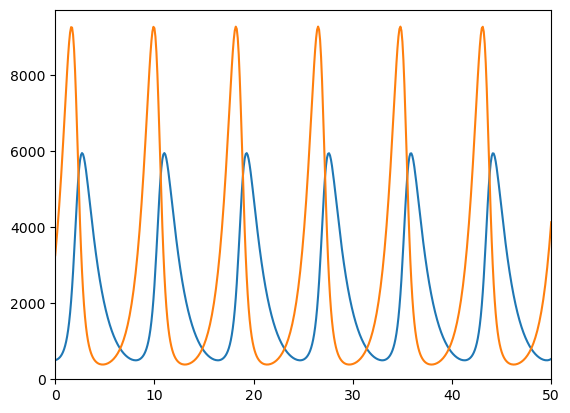

In [154]:
plt.plot(T,L)
plt.plot(T,G)
plt.xlim(0,50)
plt.ylim(bottom=0)

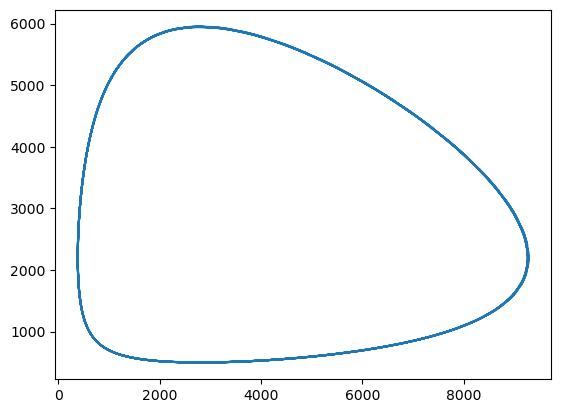

In [155]:
plt.plot(G,L)